In [12]:
## Importar librerías

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
data = pd.read_csv('../data/processed/data_normalized.csv')
data.head()

,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,issue_reported_year,issue_reported_month,...,issue_reported_hour,issue_responded_year,issue_responded_month,issue_responded_day,issue_responded_hour,survey_response_year,survey_response_month,survey_response_day,survey_response_hour,CSAT Score
0,-0.317142,0.755519,0.707812,0.877843,0.068263,-1.431405,-0.397642,0.524380,0.0,0.05424,...,1.678983,0.0,0.0,0.294428,-1.527824,0.0,0.0,0.294428,0.0,5
1,-0.317142,0.755519,0.707812,-0.476728,-0.186066,-1.431405,0.326468,2.976530,0.0,0.05424,...,-0.915119,0.0,0.0,-0.955566,-0.676284,0.0,0.0,-0.955566,0.0,4
2,1.983957,0.755519,-0.838827,1.042110,-1.203383,1.968200,1.050579,-0.701695,0.0,0.05424,...,0.481705,0.0,0.0,0.521700,0.515872,0.0,0.0,0.521700,0.0,5
3,-0.317142,-1.094115,-1.070823,1.198796,-0.694725,0.608358,0.326468,0.524380,0.0,0.05424,...,-0.316480,0.0,0.0,0.294428,-0.165360,0.0,0.0,0.294428,0.0,5
4,-0.317142,0.755519,0.630480,1.370644,1.424685,-0.071563,-1.845863,0.524380,0.0,0.05424,...,-0.915119,0.0,0.0,-1.069202,-0.676284,0.0,0.0,-1.069202,0.0,5


In [3]:
"""
Basado en el análisis exploratorio de datos (EDA), separamos las columnas de año, mes y día de las variables 
issue_responded y survey_response, ya que están altamente correlacionadas (casi 1) con issue_reported.
Sin embargo, incluimos los valores de la hora para estas tres variables.
"""

X = data.drop(['CSAT Score','Agent_name', 
       'issue_responded_year', 'issue_responded_month', 'issue_responded_day',
      'survey_response_year', 'survey_response_month',
       'survey_response_day',],axis=1)
y = data['CSAT Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    


In [4]:
X.columns

Index(['channel_name', 'category', 'Sub-category', 'Supervisor', 'Manager',
       'Tenure Bucket', 'Agent Shift', 'issue_reported_year',
       'issue_reported_month', 'issue_reported_day', 'issue_reported_hour',
       'issue_responded_hour', 'survey_response_hour'],
      dtype='object')

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [6]:
# Precisión
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.6944476778023513


In [7]:
# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, predictions))



Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1105
           2       0.00      0.00      0.00       124
           3       0.00      0.00      0.00       229
           4       0.00      0.00      0.00      1167
           5       0.69      1.00      0.82      5966

    accuracy                           0.69      8591
   macro avg       0.14      0.20      0.16      8591
weighted avg       0.48      0.69      0.57      8591



/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

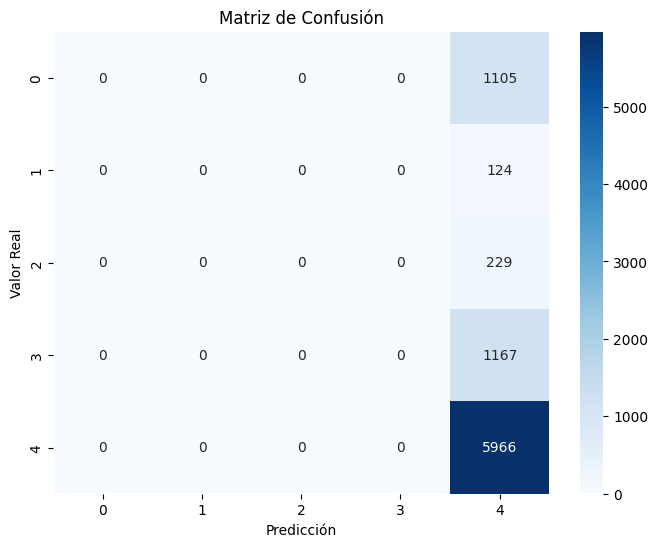

In [8]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', )
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

### Optimización del modelo

In [9]:

# Crear el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Actualiza los valores permitidos
    'bootstrap': [True, False]
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy (mejor modelo):", accuracy_score(y_test, y_pred_best))
print("Classification Report (mejor modelo):\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix (mejor modelo):\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tota

/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  13.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  22.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  19.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  21.7s
[CV] END bootstrap=True, max_depth=20, max_featu

/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
216 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    es

Mejores parámetros encontrados: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy (mejor modelo): 0.6944476778023513


/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/joseph/Documents/proyecto-portafolio/análisis_de_satifacción_de_clientes/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

Classification Report (mejor modelo):
               precision    recall  f1-score   support

           1       0.43      0.01      0.01      1105
           2       0.00      0.00      0.00       124
           3       0.00      0.00      0.00       229
           4       0.00      0.00      0.00      1167
           5       0.69      1.00      0.82      5966

    accuracy                           0.69      8591
   macro avg       0.22      0.20      0.17      8591
weighted avg       0.54      0.69      0.57      8591

Confusion Matrix (mejor modelo):
 [[   6    0    0    0 1099]
 [   1    0    0    0  123]
 [   0    0    0    0  229]
 [   1    0    0    0 1166]
 [   6    0    0    0 5960]]


In [35]:


importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

importan = {}
for i in range(X.shape[1]):
    importan[X.columns[indices[i]]] = (importances[indices[i]]*100).round(2)
    print(f"{i+1}. {X.columns[indices[i]]} ({importances[indices[i]]})")



1. Sub-category (0.17973083906454487)
2. issue_reported_day (0.14208579353533005)
3. issue_responded_hour (0.11914155529396367)
4. category (0.11540182911888024)
5. Supervisor (0.1153468356466372)
6. issue_reported_hour (0.11258545824086175)
7. Manager (0.061925703759156826)
8. Tenure Bucket (0.0518162424585313)
9. Agent Shift (0.049358334985648775)
10. channel_name (0.04189630921221397)
11. issue_reported_month (0.01071109868423138)
12. survey_response_hour (0.0)
13. issue_reported_year (0.0)


In [36]:
# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(list(importan.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
print(df)

                 Feature  Importance
0           Sub-category       17.97
1     issue_reported_day       14.21
2   issue_responded_hour       11.91
3               category       11.54
4             Supervisor       11.53
5    issue_reported_hour       11.26
6                Manager        6.19
7          Tenure Bucket        5.18
8            Agent Shift        4.94
9           channel_name        4.19
10  issue_reported_month        1.07
11  survey_response_hour        0.00
12   issue_reported_year        0.00


### Insights del Análisis

Durante el análisis, se identificaron algunas variables que tienen una influencia significativa en la satisfacción del cliente:

- La subcategoría de las interacciones parece ser el factor más influyente en la satisfacción del cliente.
- Los días y horas en que se realizan las interacciones también tienen un impacto importante en la satisfacción del cliente, y la hora de la respuesta.
- Se observa una correlación considerable entre la satisfacción del cliente y los supervisores, manager y la experiencia involucrados en las interacciones.

Estos insights proporcionan información valiosa sobre los factores que más influyen en la satisfacción del cliente y pueden servir como base para futuros análisis y acciones para mejorar la experiencia del cliente.
